##### 지도 학습
> - 데이터와 정답을 입력과 타킷이라 하고, 이 둘을 합쳐 훈련 데이터라고 부른다.
> - 앞서 사용한 생선의 무게와 길이를 특성이라고 한다. -> 구분하는 데 사용한 데이터
> - 즉 정답이 있으니 알고리즘이 정답을 맞히는 것을 학습한다.

##### 비지도 학습
> - 타깃 없이 (정답 없이) 입력 데이터만 사용
> - 정답을 맞힐 수는 없지만 데이터 파악, 변형에 도움을 준다.


##### 테스트 세트
> - 평가에 사용하는 데이터

##### 훈련 세트
> - 훈련에 사용되는 데이터
> - 훈련에 사용한 데이터로 모델을 평가하는 것은 적절하지 않다.

##### 샘플링 편향
> - 샘플링이 한쪽으로 치우쳐져 있다.
> - 훈련 세트와 테스트 세트를 섞어야 한다.

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split #트레이닝 / 테스트 셋 구분

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]


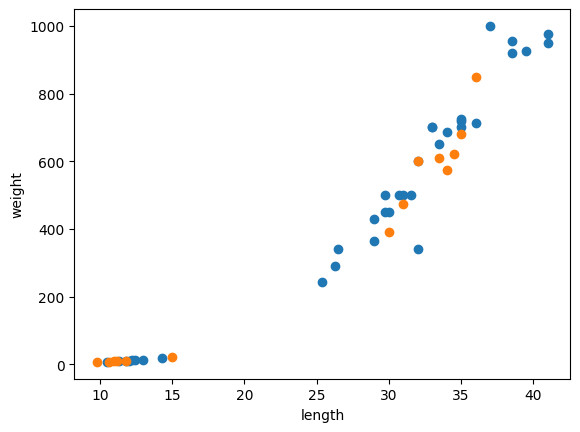

In [8]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
print(fish_data)
print()

fish_target = [1] * 35 + [0] * 14
print(fish_target)
print()

# train_input = fish_data[:35] #훈련 세트 입력값
# train_target = fish_target[:35] #훈련 세트 타깃값

# test_input = fish_data[35:] # 테스트 세트 입력값
# test_target = fish_target[35:] #테스트 세트 타깃값
# print()

# kn = KNeighborsClassifier()
# kn.fit(train_input, train_target)
# kn.score(test_input, test_target) 
# 정확도 0 -> 마지막 14개를 테스트 세트로 하면 훈련 세트에 빙어가 없다 -> 빙어 없이 모델 훈련해 빙어를 분류할 수가 없다. => 훈련 세트와 테스트 세트를 섞어야 한다.
#샘플링 편향 = 샘플링이 한쪽으로 치우쳐져 있다.


#넘파이 배열 만들기
# 49개의 행(샘플)과 2개의 열(특성)
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)
print(target_arr)
print()

np.random.seed(42)
index = np.arange(49) #0~48까지의 배열
np.random.shuffle(index)


train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
# print(train_input)
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


plt.scatter(train_input[:,0], train_input[:,1]) #길이와 무게를 나눈다. / 파란 색이 훈련 세트
plt.scatter(test_input[:,0], test_input[:,1]) #길이와 무게를 나눈다. / 주황 색이 테스트 세트
plt.xlabel('length')
plt.ylabel('weight')
# print(train_input[:,0])
print()

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target) # score = 성능 측정, 특성과 정답 데이터를 전달
print(kn.score(test_input, test_target))

print(kn.predict(test_input)) # predict = 모델 훈련 예측
print(test_target)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]

[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]]
[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]

[0.]


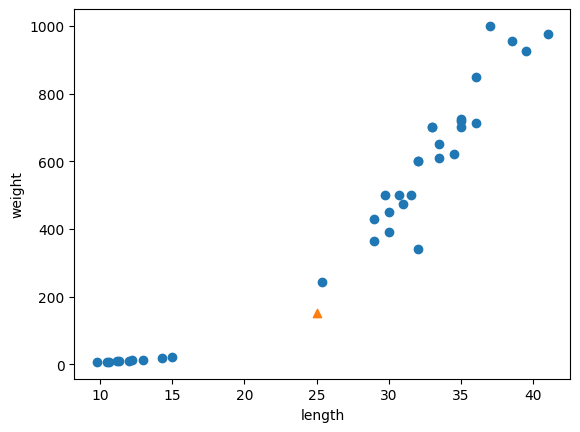

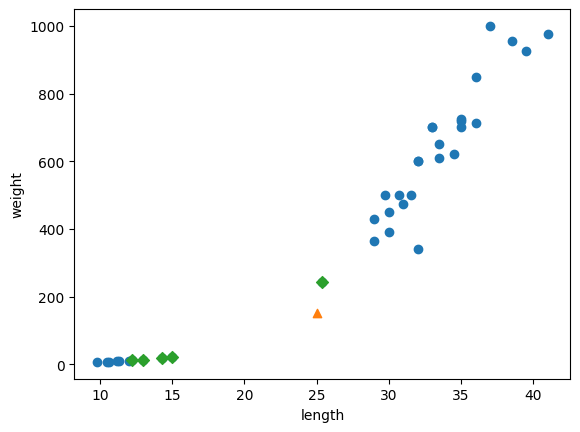

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]] [[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]



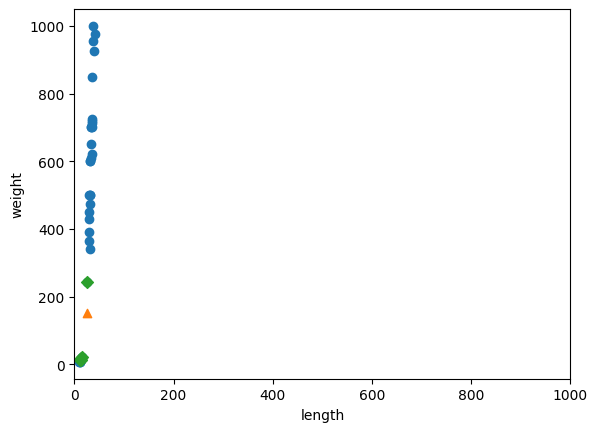

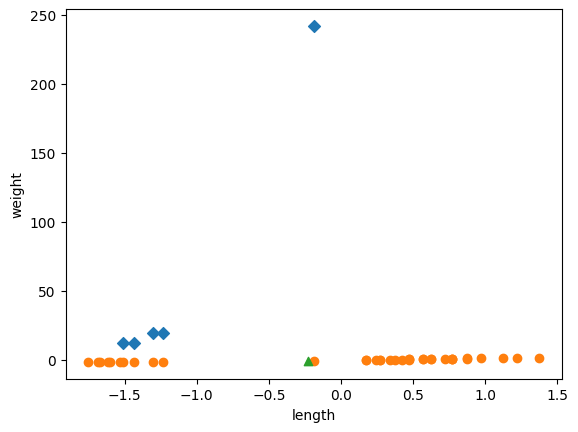

[1.]


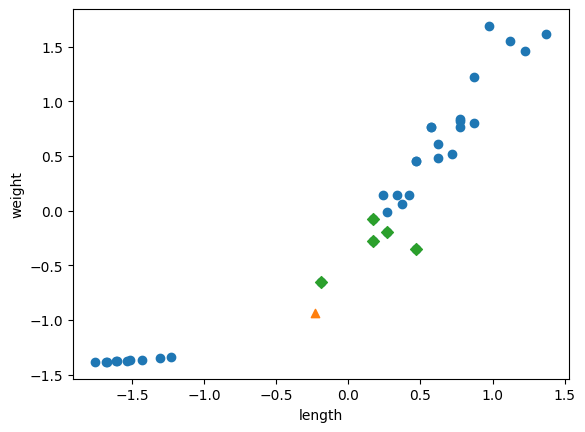

[1.]


In [10]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# np.column_stack(([1,2,3], [4,5,6])) -> column_stack 함수는 두 리스트를 일렬로 세운다
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])
print()

fish_target= np.concatenate((np.ones(35), np.zeros(14))) #np.concatenate 연결
print(fish_target)
print()

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(train_input)
print(train_target)
print()
# 무작위로 데이터를 나눴을 때 샘플이 골고루 섞이지 않을 수 있다.
# stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다.

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25, 150]]))

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


distances, indexes = kn.kneighbors([[25,150]]) #이웃찾기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(train_input[indexes], train_target[indexes])
print(distances)
print()


# 스케일이 다르다 -> 두 특성(길이, 무게)의 값이 놓인 범위가 다르다. => 전처리: 특성 값을 일정한 기준으로 맞춰 줘야 한다.
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


# 전처리 - 표준점수(z점수): 평균에서 표준편차의 몇 배만큼 떨어져 있는가 (표준편차 = 분산의 제곱근)
# 특성의 평균을 빼고 표준편차를 나누면 된다 => 특성의 범위 차이가 너무 크다 특히, 거리 기반 일 때
# 분산 = 데이터에서 평균을 빼고 제곱한 다음 평균을 낸다.
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_scaled= (train_input - mean) / std
test_scaled = (test_input - mean) / std
# 모든 행에서 mean에 있는 두 평균 값을 뺴준다. 그 다음 std에 있는 두 표준편차를 모든 행에 적용한다. = 브로드캐스팅
# 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능
# 테스트 세트도 훈련 세트의 평균과 표준편차로 변환해야 한다. -> 훈련 세트 기준으로 테스트 세트 훈련

plt.scatter(train_scaled[indexes,0], train_input[indexes,1], marker='D')
new = ([25, 150] - mean)/std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


#새로운 데이터로 학습
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)
print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(kn.predict([new]))